# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set Parameters
units = "imperial"
lang = "en"

#Base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
get_url = f"{base_url}appid={weather_api_key}&lang={lang}&units={units}&q="
get_response = requests.get(f"{get_url}billings")

#return results for billings to see repsonse format and test connection
print(get_response.status_code)
get_json = get_response.json()
print(json.dumps(get_json, indent = 4))

200
{
    "coord": {
        "lon": -108.5007,
        "lat": 45.7833
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 50,
        "feels_like": 47.23,
        "temp_min": 50,
        "temp_max": 50,
        "pressure": 1025,
        "humidity": 29
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.91,
        "deg": 10
    },
    "clouds": {
        "all": 75
    },
    "dt": 1618621167,
    "sys": {
        "type": 1,
        "id": 3440,
        "country": "US",
        "sunrise": 1618575929,
        "sunset": 1618624889
    },
    "timezone": -21600,
    "id": 5640350,
    "name": "Billings Metropolitan Area",
    "cod": 200
}


In [4]:
#Create empty lists to append API call data to
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set Parameters
units = "imperial"
lang = "en"

#Base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
get_url = f"{base_url}appid={weather_api_key}&lang={lang}&units={units}&q="

#Create counter for print log
city_count = 0

#Create for loop to pull data from API call for each city
for city in cities:
    weather_url = f"{get_url}{city}"
    city_count += 1
    print(f"Processing Record {city_count} of Set 1 | {city}")
    city_data = requests.get(weather_url).json()
    
    #Append data for each city using try/except to account for Key Errors
    try:
        lat.append(city_data["coord"]["lat"])
        long.append(city_data["coord"]["lon"])
        max_temp.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
    
    #Use "None" to leave entries blank for KeyErrors
    except KeyError:
        lat.append(None)
        long.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)


Processing Record 1 of Set 1 | turukhansk
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | san lazaro
Processing Record 5 of Set 1 | shenjiamen
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | batagay
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | kamenka
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ruidoso
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | zapolyarnyy
Processing Record 17 of Set 1 | barentsburg
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | attawapiskat
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | diego de almagro
Processing Record 24 of Set

Processing Record 195 of Set 1 | port-gentil
Processing Record 196 of Set 1 | bengkulu
Processing Record 197 of Set 1 | ahuimanu
Processing Record 198 of Set 1 | clyde river
Processing Record 199 of Set 1 | caceres
Processing Record 200 of Set 1 | nikolskoye
Processing Record 201 of Set 1 | marovoay
Processing Record 202 of Set 1 | norman wells
Processing Record 203 of Set 1 | sinnamary
Processing Record 204 of Set 1 | longyearbyen
Processing Record 205 of Set 1 | chuy
Processing Record 206 of Set 1 | bambous virieux
Processing Record 207 of Set 1 | grand river south east
Processing Record 208 of Set 1 | tiksi
Processing Record 209 of Set 1 | grindavik
Processing Record 210 of Set 1 | ahipara
Processing Record 211 of Set 1 | samusu
Processing Record 212 of Set 1 | gat
Processing Record 213 of Set 1 | aklavik
Processing Record 214 of Set 1 | sumenep
Processing Record 215 of Set 1 | umm kaddadah
Processing Record 216 of Set 1 | saumur
Processing Record 217 of Set 1 | karkaralinsk
Process

Processing Record 390 of Set 1 | dhidhdhoo
Processing Record 391 of Set 1 | leh
Processing Record 392 of Set 1 | tongren
Processing Record 393 of Set 1 | kabalo
Processing Record 394 of Set 1 | amderma
Processing Record 395 of Set 1 | tejupilco
Processing Record 396 of Set 1 | puri
Processing Record 397 of Set 1 | valparaiso
Processing Record 398 of Set 1 | port blair
Processing Record 399 of Set 1 | kavaratti
Processing Record 400 of Set 1 | karratha
Processing Record 401 of Set 1 | sechura
Processing Record 402 of Set 1 | gujranwala
Processing Record 403 of Set 1 | oistins
Processing Record 404 of Set 1 | alizai
Processing Record 405 of Set 1 | rungata
Processing Record 406 of Set 1 | travesia
Processing Record 407 of Set 1 | lompoc
Processing Record 408 of Set 1 | kalakamati
Processing Record 409 of Set 1 | kaitangata
Processing Record 410 of Set 1 | opuwo
Processing Record 411 of Set 1 | halaszi
Processing Record 412 of Set 1 | yantal
Processing Record 413 of Set 1 | deputatskiy
Pr

Processing Record 585 of Set 1 | snellville
Processing Record 586 of Set 1 | fukue
Processing Record 587 of Set 1 | ulaangom
Processing Record 588 of Set 1 | coralville
Processing Record 589 of Set 1 | kushmurun
Processing Record 590 of Set 1 | kalat
Processing Record 591 of Set 1 | moree
Processing Record 592 of Set 1 | sydney


## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dataframe
weather_data = pd.DataFrame({
    "City":cities,
    "Latitude":lat,
    "Longitude":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
})

#Convert to readable date
weather_data["Date"] = pd.to_datetime(weather_data["Date"], unit = 's')

#Drop null values and reset index
weather_data = weather_data.dropna().reset_index(drop=True)

In [6]:
#Save to csv and display dataframe
weather_data.to_csv(output_data_file, index=False, header=True)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,turukhansk,65.8167,87.9833,-9.09,98.0,100.0,4.18,RU,2021-04-17 01:04:19
1,puerto ayora,-0.7393,-90.3518,75.99,97.0,88.0,1.99,EC,2021-04-17 01:04:19
2,ponta do sol,32.6667,-17.1000,60.01,72.0,6.0,1.01,PT,2021-04-17 01:04:20
3,san lazaro,18.0387,-88.6622,82.40,74.0,40.0,13.80,BZ,2021-04-17 01:04:21
4,shenjiamen,29.9576,122.2980,60.80,81.0,98.0,15.32,CN,2021-04-17 01:04:21


In [7]:
#Dispay quick summary of data frame statistics
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,19.405640,15.534621,59.194147,69.658716,50.143119,8.011229
std,33.142682,92.454344,21.116701,22.199568,40.261207,5.621134
min,-54.800000,-179.166700,-17.520000,7.000000,0.000000,0.340000
25%,-7.156800,-69.363200,46.400000,60.000000,6.000000,4.230000
50%,22.285500,20.744700,62.170000,75.000000,43.000000,6.910000
75%,45.292400,96.370000,77.760000,85.000000,93.000000,10.510000
max,78.218600,179.316700,90.360000,100.000000,100.000000,51.050000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Display cities with humidity greater than 100%
humidaf = weather_data.loc[weather_data["Humidity"] > 100, :]
humidaf

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#Get the indices of cities that have humidity over 100%.
humid_indices = weather_data.index[weather_data['Humidity'] > 100]
print(f"Number of cities with humidity over 100%: {len(humid_indices)}")

Number of cities with humidity over 100%: 0


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_indices, inplace=False)
print(f"Number of cities to use in data analysis: {len(clean_city_data)}")
clean_city_data.head()

Number of cities to use in data analysis: 545


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,turukhansk,65.8167,87.9833,-9.09,98.0,100.0,4.18,RU,2021-04-17 01:04:19
1,puerto ayora,-0.7393,-90.3518,75.99,97.0,88.0,1.99,EC,2021-04-17 01:04:19
2,ponta do sol,32.6667,-17.1000,60.01,72.0,6.0,1.01,PT,2021-04-17 01:04:20
3,san lazaro,18.0387,-88.6622,82.40,74.0,40.0,13.80,BZ,2021-04-17 01:04:21
4,shenjiamen,29.9576,122.2980,60.80,81.0,98.0,15.32,CN,2021-04-17 01:04:21


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
#Create function to make plotting uniform and efficient
def scatter(x, y):
    plt.scatter(x, y, marker = '.', c='yellow', edgecolor='black', label = 'City')
    plt.grid()

## Latitude vs. Temperature Plot

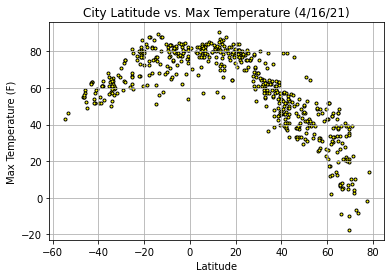

In [12]:
scatter(clean_city_data["Latitude"], clean_city_data["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (4/16/21)")
plt.savefig("../Images/Lat_vs_MaxTemp.png")

This plot illustrates that the closer to the equator (0 deg. latitude), the higher the temperature. Also, notice the temperatures are currently higher in the southern hemisphere because it is late summer there.

## Latitude vs. Humidity Plot

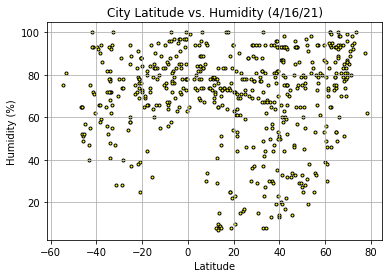

In [13]:
scatter(clean_city_data["Latitude"], clean_city_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (4/16/21)")
plt.savefig("../Images/Lat_vs_Humidity.png")

This plot shows humidity vs latitude.  I do not see any relationship here.

## Latitude vs. Cloudiness Plot

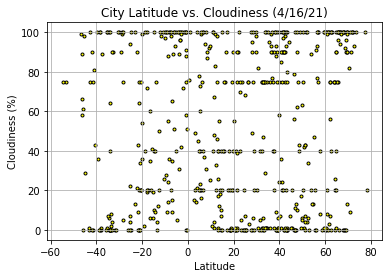

In [14]:
scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (4/16/21)")
plt.savefig("../Images/Lat_vs_Cloudiness.png")

Plot of cloudiness as a percentage vs. latitude.  I do not see a relationship here either.  It is interesting to note the human influence of this metric as the numbers are reported or round to "pretty numbers" (20, 40, 75, 90, etc).

## Latitude vs. Wind Speed Plot

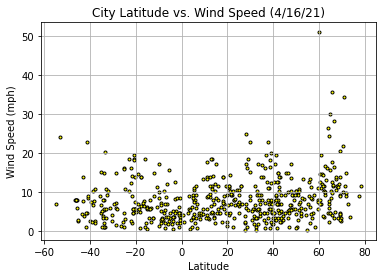

In [15]:
scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (4/16/21)")
plt.savefig("../Images/Lat_vs_Wind Speed.png")

This plot shows wind speed in mph vs latitude.  There isn't much of a relationship, but it is interesting that most windy locations are in the northern hemisphere. This could simply be due to the fact that this data set doesn't have any cities below 60 degrees in the southern hemisphere.

## Linear Regression

In [16]:
#Create dataframes for the northern and southern hemispheres
northern_hemi = clean_city_data.loc[clean_city_data["Latitude"] >= 0, :]
southern_hemi = clean_city_data.loc[clean_city_data["Latitude"] < 0, :]
southern_hemi.head()

#Create function to efficiently and uniformly create several plots
def regression(x, y):
    (m, b, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = m*x+b
    line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
    plt.annotate(line_eq,(6, 10), xycoords = 'axes points', fontsize=15,color="red")
    plt.plot(x, regress_values, "r-")
    plt.scatter(x, y)
    print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8874701305437697


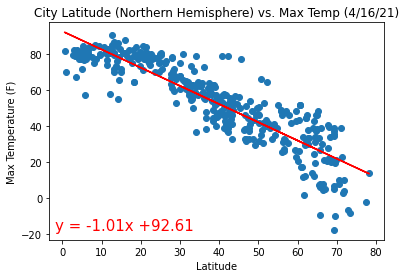

In [17]:
regression(northern_hemi["Latitude"], northern_hemi["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude (Northern Hemisphere) vs. Max Temp (4/16/21)")
plt.savefig("../Images/NHLat_vs_MaxTemp_LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7303788368008408


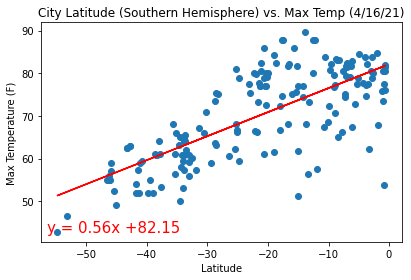

In [18]:
regression(southern_hemi["Latitude"], southern_hemi["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude (Southern Hemisphere) vs. Max Temp (4/16/21)")
plt.tight_layout()
plt.savefig("../Images/SHLat_vs_MaxTemp_LR.png")

These plots both show a fairly strong correlation between latitude and temperature.  The r-value is larger for the northern hemisphere, indicating a stronger correlation. This could be due to having more data points in the northern hemisphere or the random sample.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14194134004380327


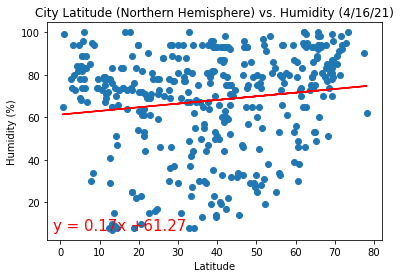

In [19]:
regression(northern_hemi["Latitude"], northern_hemi["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (Northern Hemisphere) vs. Humidity (4/16/21)")
plt.savefig("../Images/NHLat_vs_Humidity_LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3016364342746825


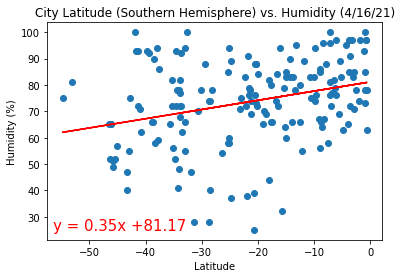

In [20]:
regression(southern_hemi["Latitude"], southern_hemi["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (Southern Hemisphere) vs. Humidity (4/16/21)")
plt.savefig("../Images/SHLat_vs_Humidity_LR.png")

There doesn't appear to be a strong correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1661089964755031


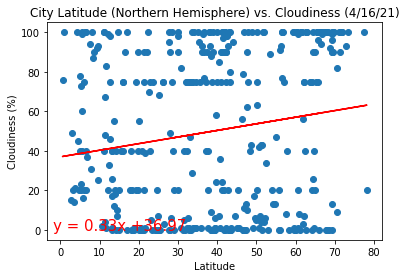

In [21]:
regression(northern_hemi["Latitude"], northern_hemi["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (Northern Hemisphere) vs. Cloudiness (4/16/21)")
plt.savefig("../Images/NHLat_vs_Cloudiness_LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1775360630667145


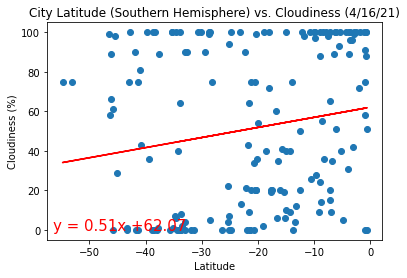

In [22]:
regression(southern_hemi["Latitude"], southern_hemi["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness (4/16/21)")
plt.savefig("../Images/SHLat_vs_Cloudiness_LR.png")

There is not a strong correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21573938502512952


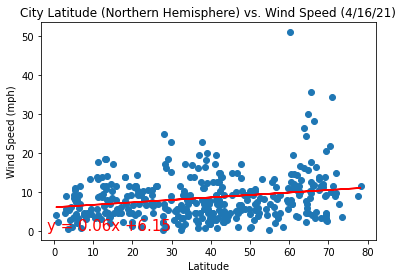

In [23]:
regression(northern_hemi["Latitude"], northern_hemi["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed (4/16/21)")
plt.savefig("../Images/NHLat_vs_Windspeed_LR.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16381476896208805


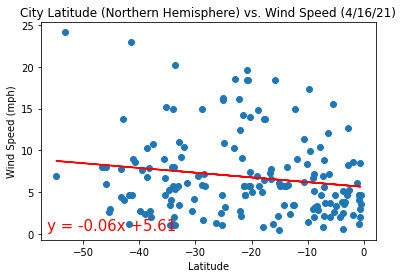

In [24]:
regression(southern_hemi["Latitude"], southern_hemi["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed (4/16/21)")
plt.savefig("../Images/SHLat_vs_Windspeed_LR.png")

It does appear that as the distance increases from the equator the wind blows harder.  However, this is a pretty weak correlation. 